In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading and Review Data

In [2]:
df = pd.read_csv("Data/diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# mengecek data kosong
df.isnull().values.any()

False

In [7]:
# mengecek korelasi dan gada reposity membuat helper
def plot_corr(df, size=11):
    corr= df.corr()
    fig, ax=plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

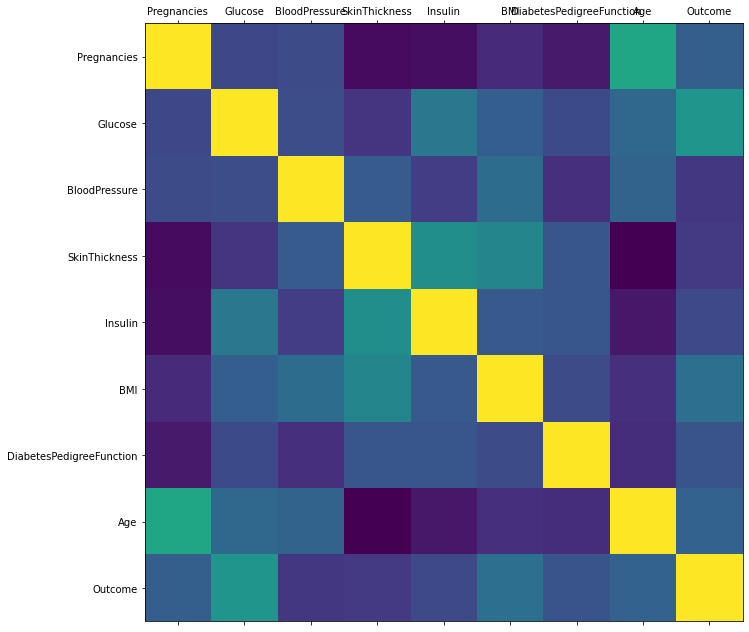

In [8]:
plot_corr(df)

Kalo ada korelasi warnya berubah jadi kuning. 

In [9]:
# mengecek kembali
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Merapihkan data

In [10]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Jika data outcame masi berupa true dan false dan ingin mengubah ke boolean

In [11]:
#diabetes_map = {True: 1, False:0}
#df["diabetes"]= df["diabetes"].map(diabetes_map)

menegecek null values

In [12]:
df.isnull().values.any()

False

Mengecek distribusi

In [13]:
num_obs = len(df)
num_true = len(df.loc[df['Outcome'] == 1])
num_flse = len(df.loc[df['Outcome'] == 0])
print("Jumlah terkena diabetes       : {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Jumlah tidak terkena diabetes : {0} ({1:2.2f}%)".format(num_flse, (num_flse/num_obs)*100))

Jumlah terkena diabetes       : 268 (34.90%)
Jumlah tidak terkena diabetes : 500 (65.10%)


## Training data

In [14]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Mengecek apakah sudah 70% training dan 30% test?

In [17]:
print('{0:0.2f}% ada pada training set'.format((len(X_train)/len(df.index))*100))
print('{0:0.2f}% ada pada test set'.format((len(X_test)/len(df.index))*100))

69.92% ada pada training set
30.08% ada pada test set


Mengecek apakah orginal outcame tersplit dengan baik

In [18]:
print("Jumlah Original terkena diabetes       : {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome']==1]), (len(df.loc[df['Outcome']==1])/len(df.index))*100.0))
print("Jumlah Original terkena diabetes       : {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome']==0]), (len(df.loc[df['Outcome']==0])/len(df.index))*100.0))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) *100.0)))
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) *100.0)))
print("")
print("Testing True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) *100.0)))
print("Testing True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) *100.0)))


Jumlah Original terkena diabetes       : 268 (34.90%)
Jumlah Original terkena diabetes       : 500 (65.10%)

Training True : 188 (35.01%)
Training True : 349 (64.99%)

Testing True : 80 (34.63%)
Testing True : 151 (65.37%)


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing Glucose {0}".format(len(df.loc[df['Glucose'] == 0])))
print("# rows missing BloodPressure {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("# rows missing SkinThickness {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# rows missing Insulin {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# rows missing BMI {0}".format(len(df.loc[df['BMI'] == 0])))
print("# rows missing DiabetesPedigreeFunction {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("# rows missing Age {0}".format(len(df.loc[df['Age'] == 0])))

# rows in dataframe 768
# rows missing Glucose 5
# rows missing BloodPressure 35
# rows missing SkinThickness 227
# rows missing Insulin 374
# rows missing BMI 11
# rows missing DiabetesPedigreeFunction 0
# rows missing Age 0


In [22]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test  = fill_0.fit_transform(X_test)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Training naive bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Uji akurasi

In [25]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


In [26]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics
print("nb_predcit_test", nb_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predcit_test [0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
y_test [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [

In [27]:
print("Confusion Matrix")


Confusion Matrix
